In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv("E:/Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [6]:
clean_df=df.dropna()

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               19662 non-null  int64 
 1   Clothing ID              19662 non-null  int64 
 2   Age                      19662 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              19662 non-null  object
 5   Rating                   19662 non-null  int64 
 6   Recommended IND          19662 non-null  int64 
 7   Positive Feedback Count  19662 non-null  int64 
 8   Division Name            19662 non-null  object
 9   Department Name          19662 non-null  object
 10  Class Name               19662 non-null  object
dtypes: int64(6), object(5)
memory usage: 1.8+ MB


In [8]:
sentences = clean_df['Review Text']
labels = clean_df['Recommended IND']

In [9]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [10]:
# word_index
len(word_index)

14245

In [12]:
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(padded[0])
print(padded.shape)

[   3   67  316  179 1087   13    8   19    4   52  196    6    9  103
   13   32    3 1171   53    2   92   47   18  235   22   11    3  222
    8    9   30 6425   47   17   47   10  640   21    3  119   20  805
    6   45    3 2153    6   10   92   97   79   16   40  630  252    2
   27  654   16   70    4   26  256   11    2  174  654   67    5   25
  149  276  468    4  522  737  500 4400  153  971 1893    5 1955  143
 1655   16    2 4400  153  468  823 3129  309    2  467    6  674    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
(19662, 115)


In [34]:
vocab_size = 20000
embedding_dim = 115
max_length = 1000
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 12000

In [35]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [36]:
tokenizer1 = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer1.fit_on_texts(training_sentences)

In [37]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [38]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
    
])
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 1000, 115)         2300000   
_________________________________________________________________
global_average_pooling1d_10  (None, 115)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 120)               13920     
_________________________________________________________________
dense_41 (Dense)             (None, 60)                7260      
_________________________________________________________________
dense_42 (Dense)             (None, 15)                915       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 16        
Total params: 2,322,111
Trainable params: 2,322,111
Non-trainable params: 0
___________________________________________

In [77]:
num_epoch = 10
history=model.fit(training_padded,training_labels,epochs=num_epoch,validation_data=(testing_padded,testing_labels), verbose=2)

Epoch 1/10
375/375 - 27s - loss: 0.4871 - accuracy: 0.8160 - val_loss: 0.4713 - val_accuracy: 0.8156
Epoch 2/10
375/375 - 26s - loss: 0.4406 - accuracy: 0.8207 - val_loss: 0.3383 - val_accuracy: 0.8443
Epoch 3/10
375/375 - 26s - loss: 0.2854 - accuracy: 0.8736 - val_loss: 0.2960 - val_accuracy: 0.8670
Epoch 4/10
375/375 - 26s - loss: 0.2421 - accuracy: 0.8988 - val_loss: 0.3269 - val_accuracy: 0.8490
Epoch 5/10
375/375 - 25s - loss: 0.2208 - accuracy: 0.9087 - val_loss: 0.2659 - val_accuracy: 0.8844
Epoch 6/10
375/375 - 26s - loss: 0.2082 - accuracy: 0.9153 - val_loss: 0.2570 - val_accuracy: 0.8900
Epoch 7/10
375/375 - 25s - loss: 0.1991 - accuracy: 0.9202 - val_loss: 0.3453 - val_accuracy: 0.8739
Epoch 8/10
375/375 - 26s - loss: 0.1813 - accuracy: 0.9302 - val_loss: 0.2629 - val_accuracy: 0.8934
Epoch 9/10
375/375 - 26s - loss: 0.1742 - accuracy: 0.9317 - val_loss: 0.2622 - val_accuracy: 0.8928
Epoch 10/10
375/375 - 25s - loss: 0.1612 - accuracy: 0.9392 - val_loss: 0.2816 - val_accura

In [44]:
pred = model.predict(testing_padded)
pred

array([[0.99883664],
       [0.11013016],
       [0.9978254 ],
       ...,
       [0.80708504],
       [0.99299496],
       [0.999915  ]], dtype=float32)

In [78]:
his = pd.DataFrame(model.history.history)

<AxesSubplot:>

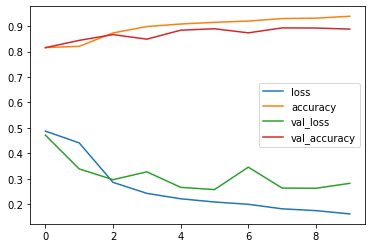

In [80]:
his.plot()

The accuracy of our model is 93%.The performance of the is good enough.

